[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue May 30 17:23:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Download dataset from Roboflow

In [ ]:
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("roboflow-jvuqo").project("fashion-assistant-segmentation")
dataset = project.version(5).download("yolov8")

/content/datasets
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.110, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to fashion-assistant-segmentation-5 in yolov8:: 100%|██████████| 1254/1254 [00:01<00:00, 1044.59it/s]


In [ ]:
!cat {dataset.location}/data.yaml

names:
- baseball cap
- hoodie
- jacket
- pants
- shirt
- shorts
- sneaker
- sunglasses
- sweatshirt
- t-shirt
nc: 10
roboflow:
  license: CC BY 4.0
  project: fashion-assistant-segmentation
  url: https://universe.roboflow.com/roboflow-jvuqo/fashion-assistant-segmentation/dataset/5
  version: 5
  workspace: roboflow-jvuqo
test: test/images
train: train/images
val: valid/images


In [ ]:
import yaml

def extract_names_from_yaml(file_path):
    with open(file_path, 'r') as file:
        try:
            yaml_content = yaml.safe_load(file)
            if 'names' in yaml_content:
                return yaml_content['names']
            else:
                return []
        except yaml.YAMLError as error:
            print(error)
            return []

In [ ]:
NAMES = extract_names_from_yaml(f'{dataset.location}/data.yaml')

## Custom Training

In [ ]:
!pip install wandb --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
IMGSZ = 960
BATCH = 8
EPOCHS = 30

In [ ]:
import wandb

config = {
    "project": "fashion-assistant-yolov8",
    "num_of_classes": len(NAMES),
    "classes": NAMES,
    "imgsz": IMGSZ,
    "batch": BATCH
}
wandb.init(project = config["project"], config = config)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
%cd {HOME}

from ultralytics import YOLO
from wandb.integration.yolov8 import add_callbacks as add_wandb_callbacks

model = YOLO('yolov8l-seg.pt')
add_wandb_callbacks(model, project = "fashion-assistant-yolov8")
results = model.train(
    data = f'{dataset.location}/data.yaml',
    epochs = EPOCHS, 
    device = 0, 
    save_period = 10,
    imgsz = IMGSZ,
    batch = BATCH
)

/content


100%|██████████| 88.1M/88.1M [00:01<00:00, 48.7MB/s]
wandb: WARNING The wandb callback is currently in beta and is subject to change based on updates to `ultralytics yolov8`.
wandb: WARNING         The callback is tested and supported for ultralytics v8.0.43 and above.
wandb: WARNING         Please report any issues to https://github.com/wandb/wandb/issues with the tag `yolov8`.
wandb: WARNING         
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/fashion-assistant-segmentation-5/data.yaml, epochs=30, patience=50, batch=8, imgsz=960, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dro

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇████
lr/pg0,█▅▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▆▇█▇█▇▇██████▇███████████████
metrics/mAP50(M),▁▆▇█▇█▇███████▇███████████████
metrics/mAP50-95(B),▁▅▆▇▆▇▆▆▇▇▇▇▇▇▆▇▇▇▇▇▇██▇█▇█▇██
metrics/mAP50-95(M),▁▆▆▇▇█▇▆▇▇▇▇█▇▆▇█▇██▇█████████
metrics/precision(B),▁▆▅▇▇▇▇▆▇▆█▇▆▇▇██▇▇▇█▇████████
metrics/precision(M),▁▆▅▇▇▇▇▆█▆▇▇▆▇▇██▇▇▇█▇████████
metrics/recall(B),▁▆█▆▆█▇▇▇█▇███▇████▇██████████


/content


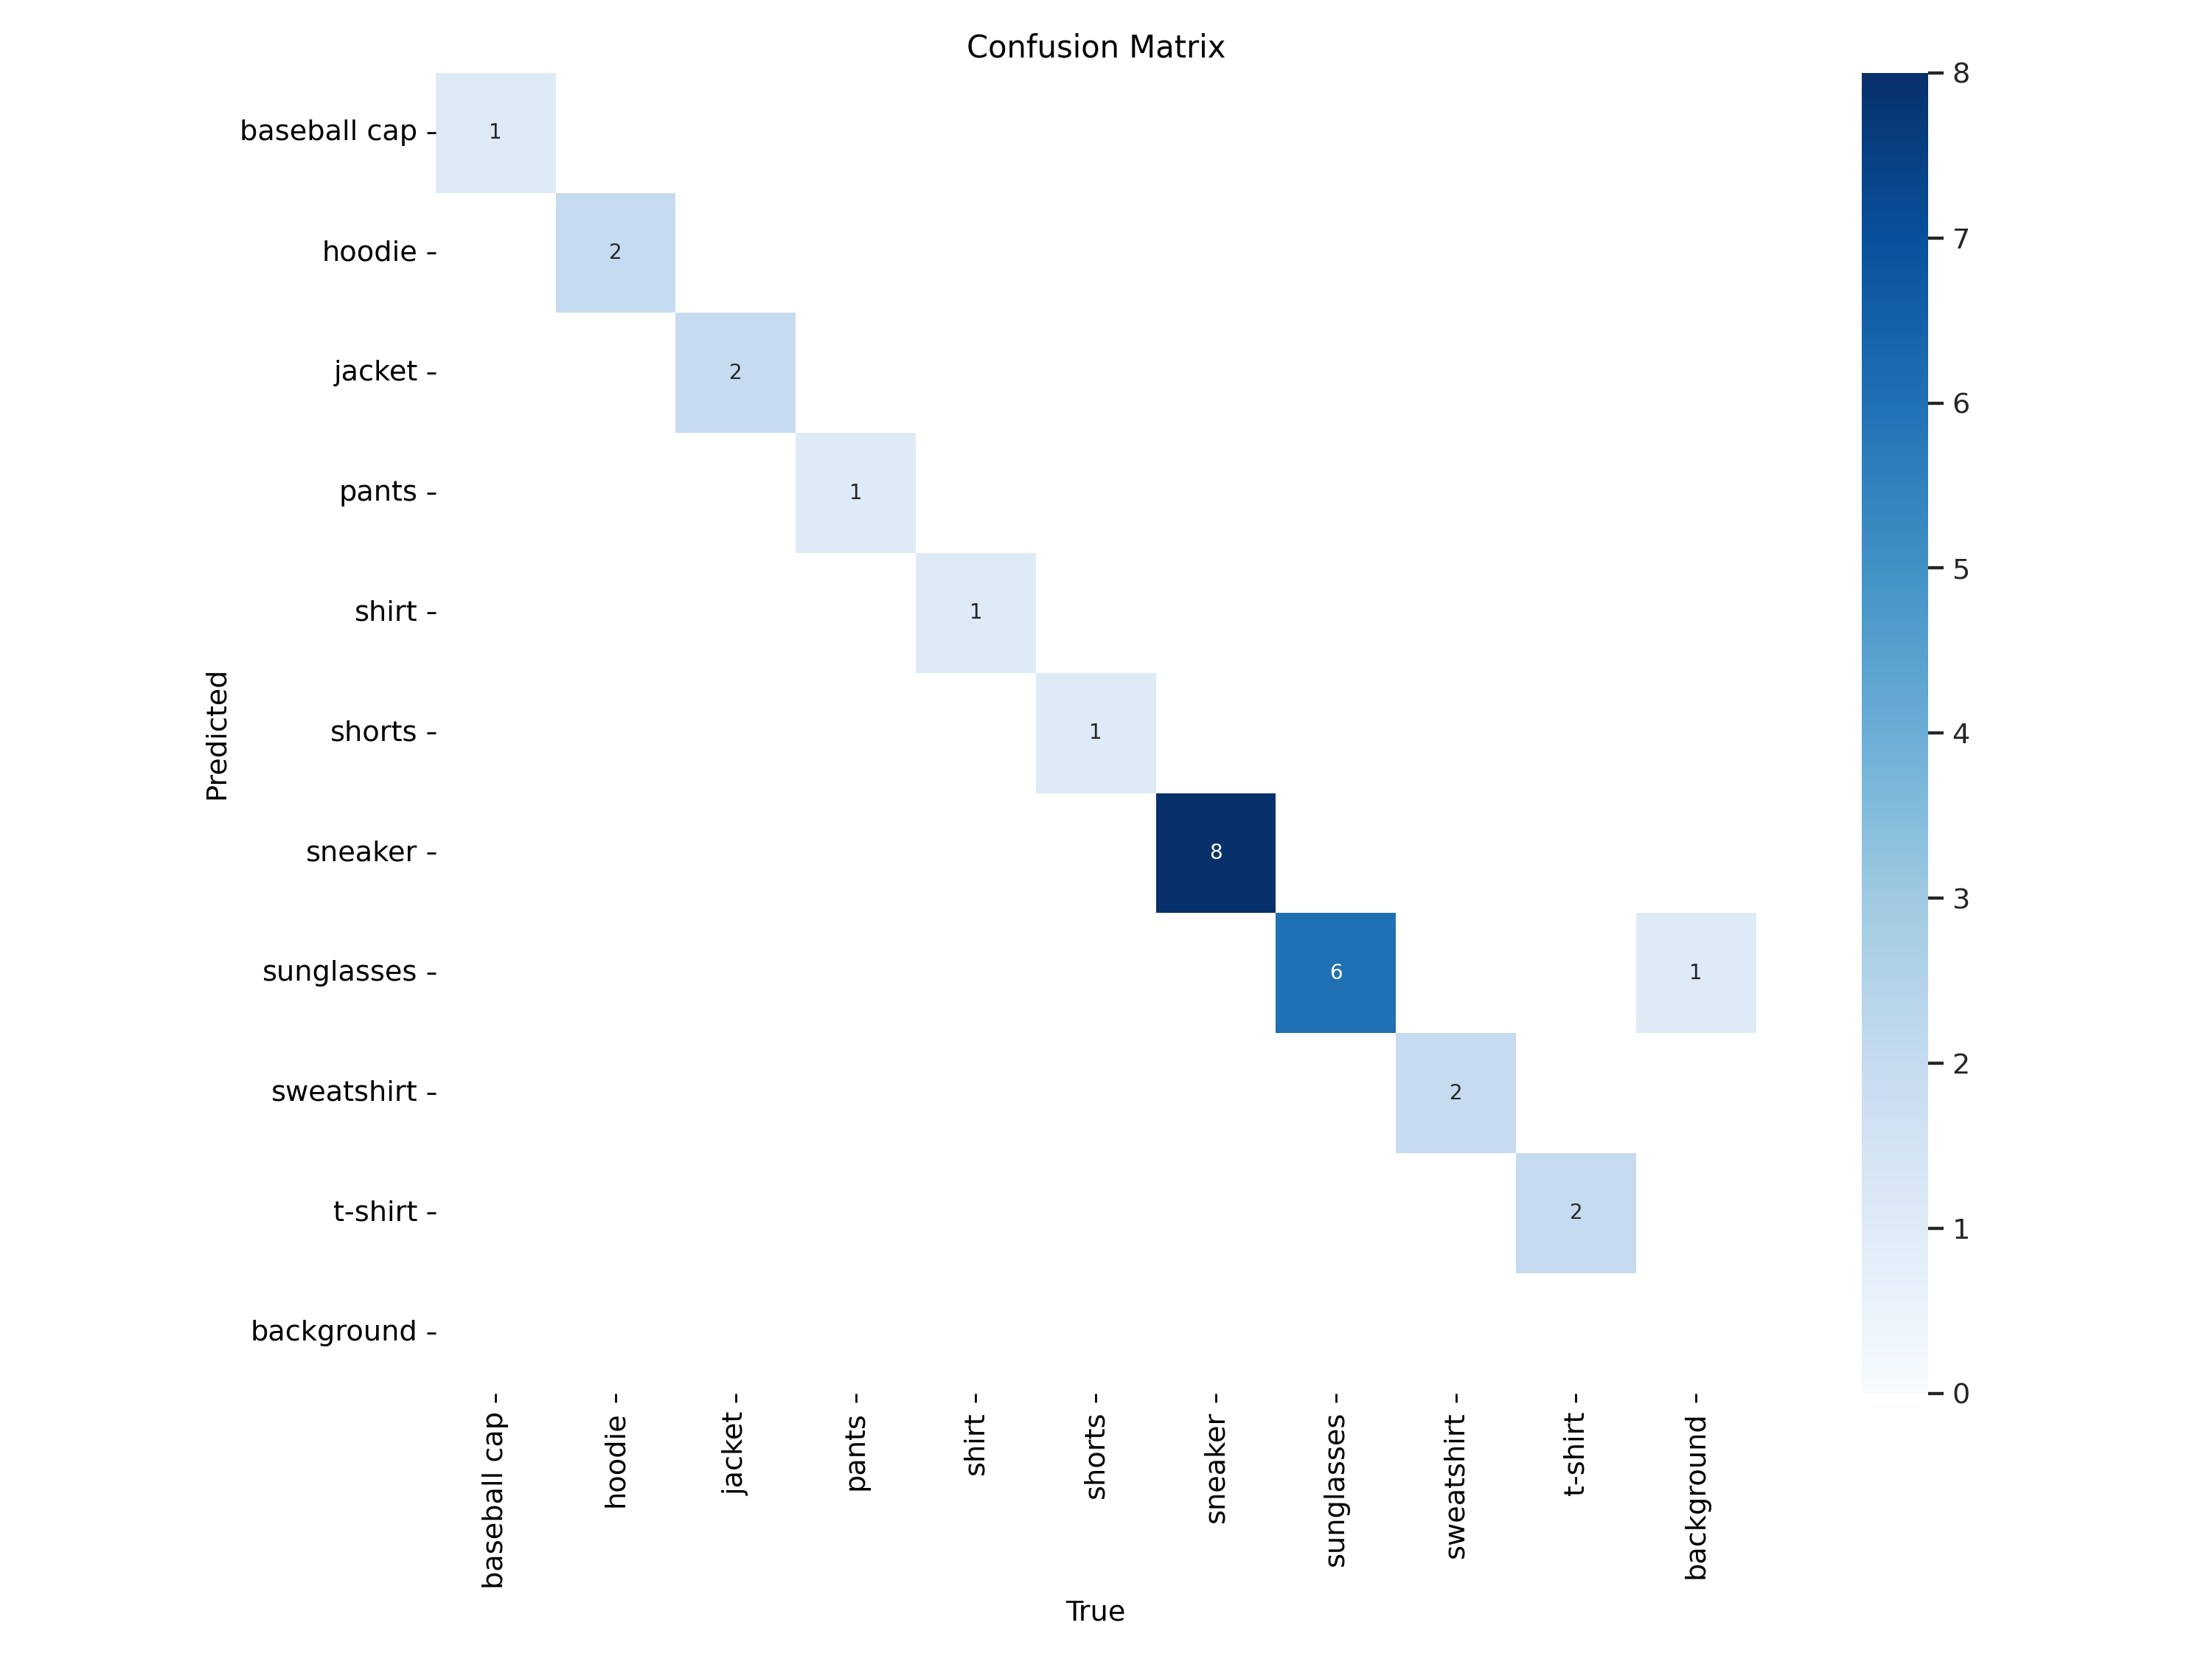

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


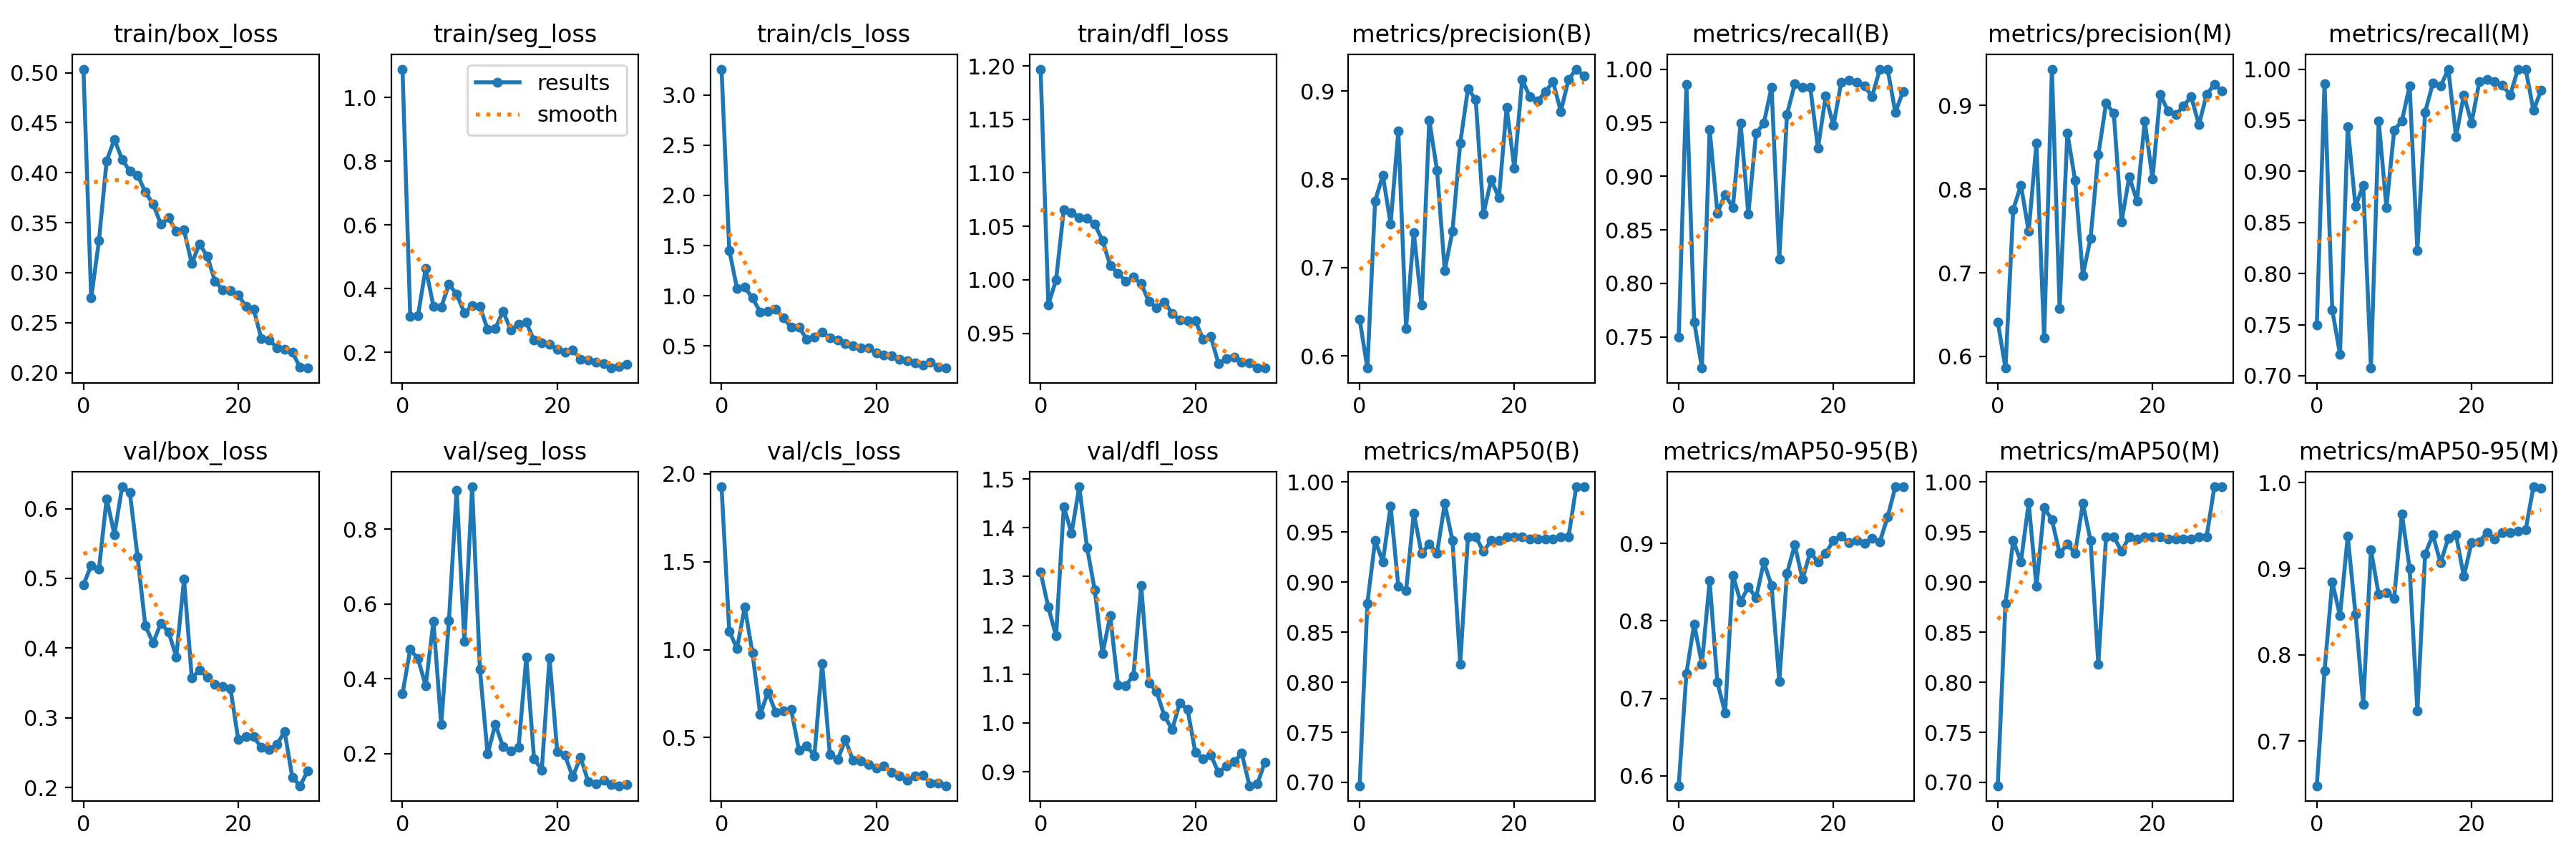

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


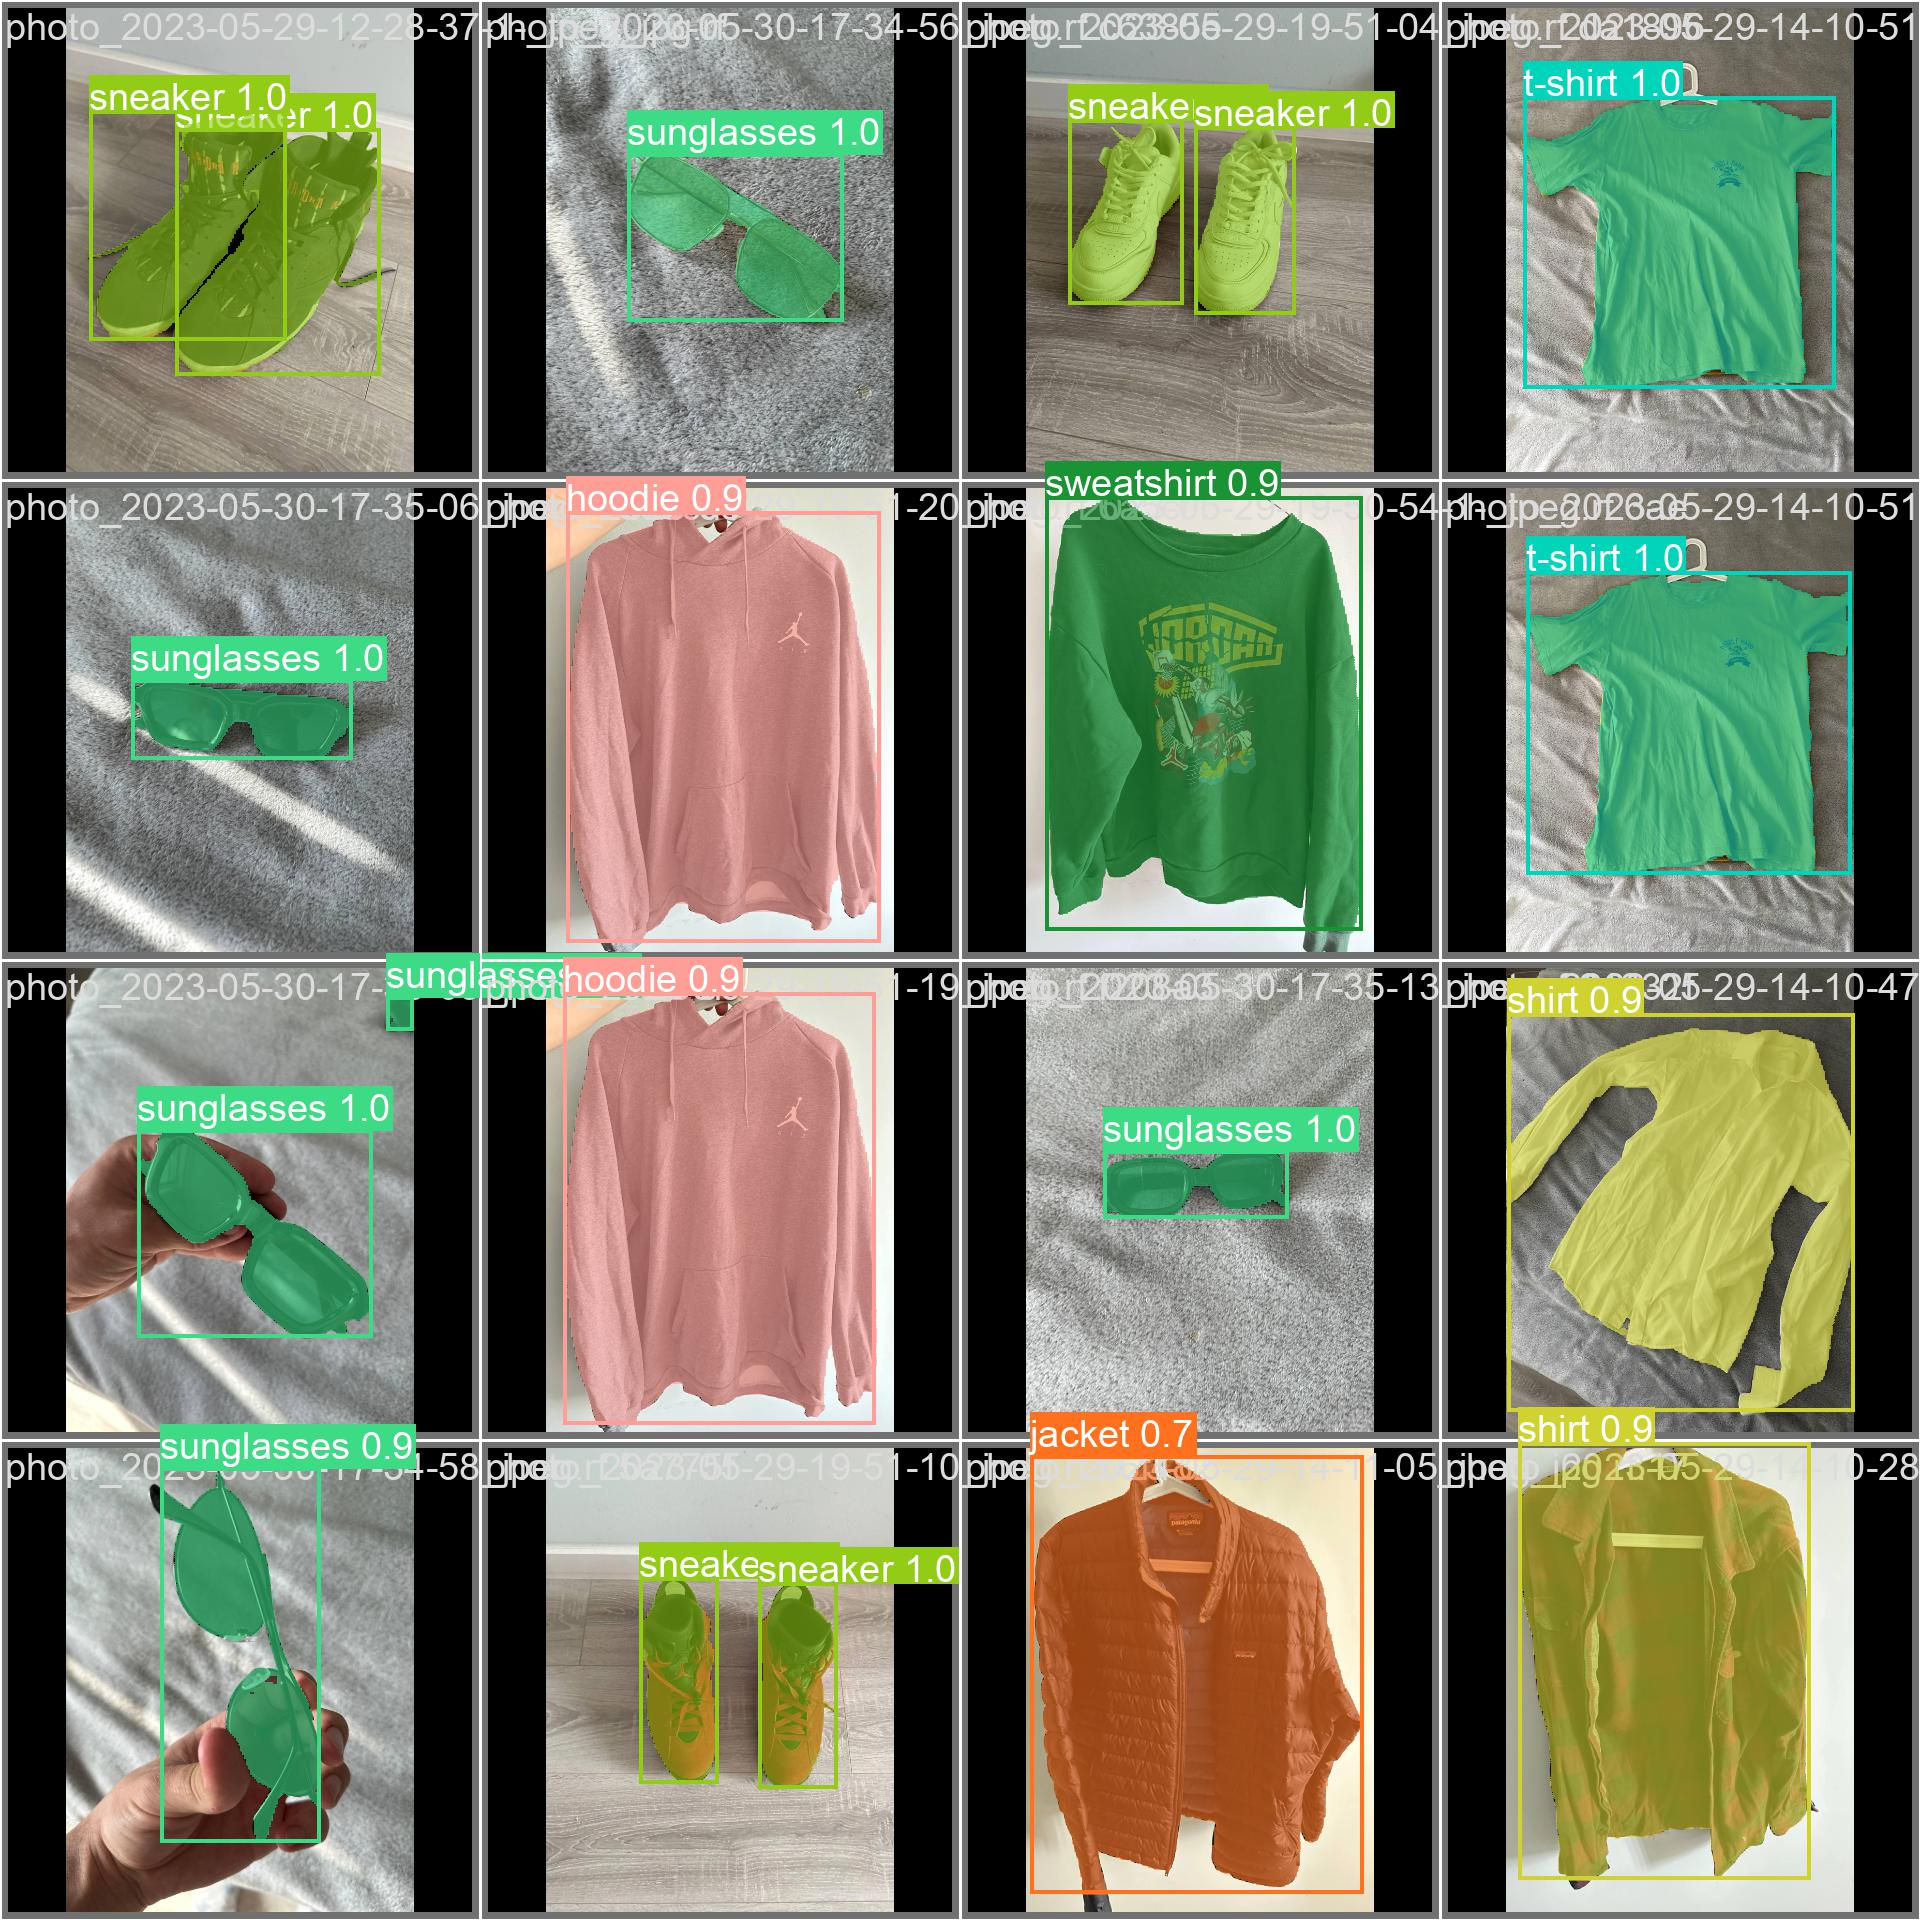

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45919598 parameters, 0 gradients
val: Scanning /content/datasets/fashion-assistant-segmentation-5/valid/labels.cache... 23 images, 1 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:05<00:00,  2.73s/it]
                   all         23         26      0.925       0.96      0.995      0.973      0.925       0.96      0.995      0.995
          baseball cap         23          1      0.943          1      0.995      0.995      0.943          1      0.995      0.995
                hoodie         23          2      0.982          1      0.995      0.995      0.982          1      0.995      0.995
                jacket         23          2          1      0.596      0.995      0.954          1      0.596

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45919598 parameters, 0 gradients

image 1/25 /content/datasets/fashion-assistant-segmentation-5/test/images/photo_2023-05-29-12-28-43_jpeg_jpg.rf.ffb296acdb54c6dc54691f2eb9c0f6cb.jpg: 960x960 1 baseball cap, 102.3ms
image 2/25 /content/datasets/fashion-assistant-segmentation-5/test/images/photo_2023-05-29-12-28-47_jpeg_jpg.rf.7e9bf6746c1cace6dcf5fd968748afc5.jpg: 960x960 1 t-shirt, 98.5ms
image 3/25 /content/datasets/fashion-assistant-segmentation-5/test/images/photo_2023-05-29-12-28-54-1-_jpeg_jpg.rf.2664c502428a707b9d1c9db921f11ae3.jpg: 960x960 1 hoodie, 96.5ms
image 4/25 /content/datasets/fashion-assistant-segmentation-5/test/images/photo_2023-05-29-12-29-05_jpeg_jpg.rf.e70f0f3167a89ba9f10baa1ed7b381e2.jpg: 960x960 1 sneaker, 1 sweatshirt, 96.2ms
image 5/25 /content/datasets/fashion-assistant-segmentation-5/test/images/photo_2023-05-29-12-29-11_jp

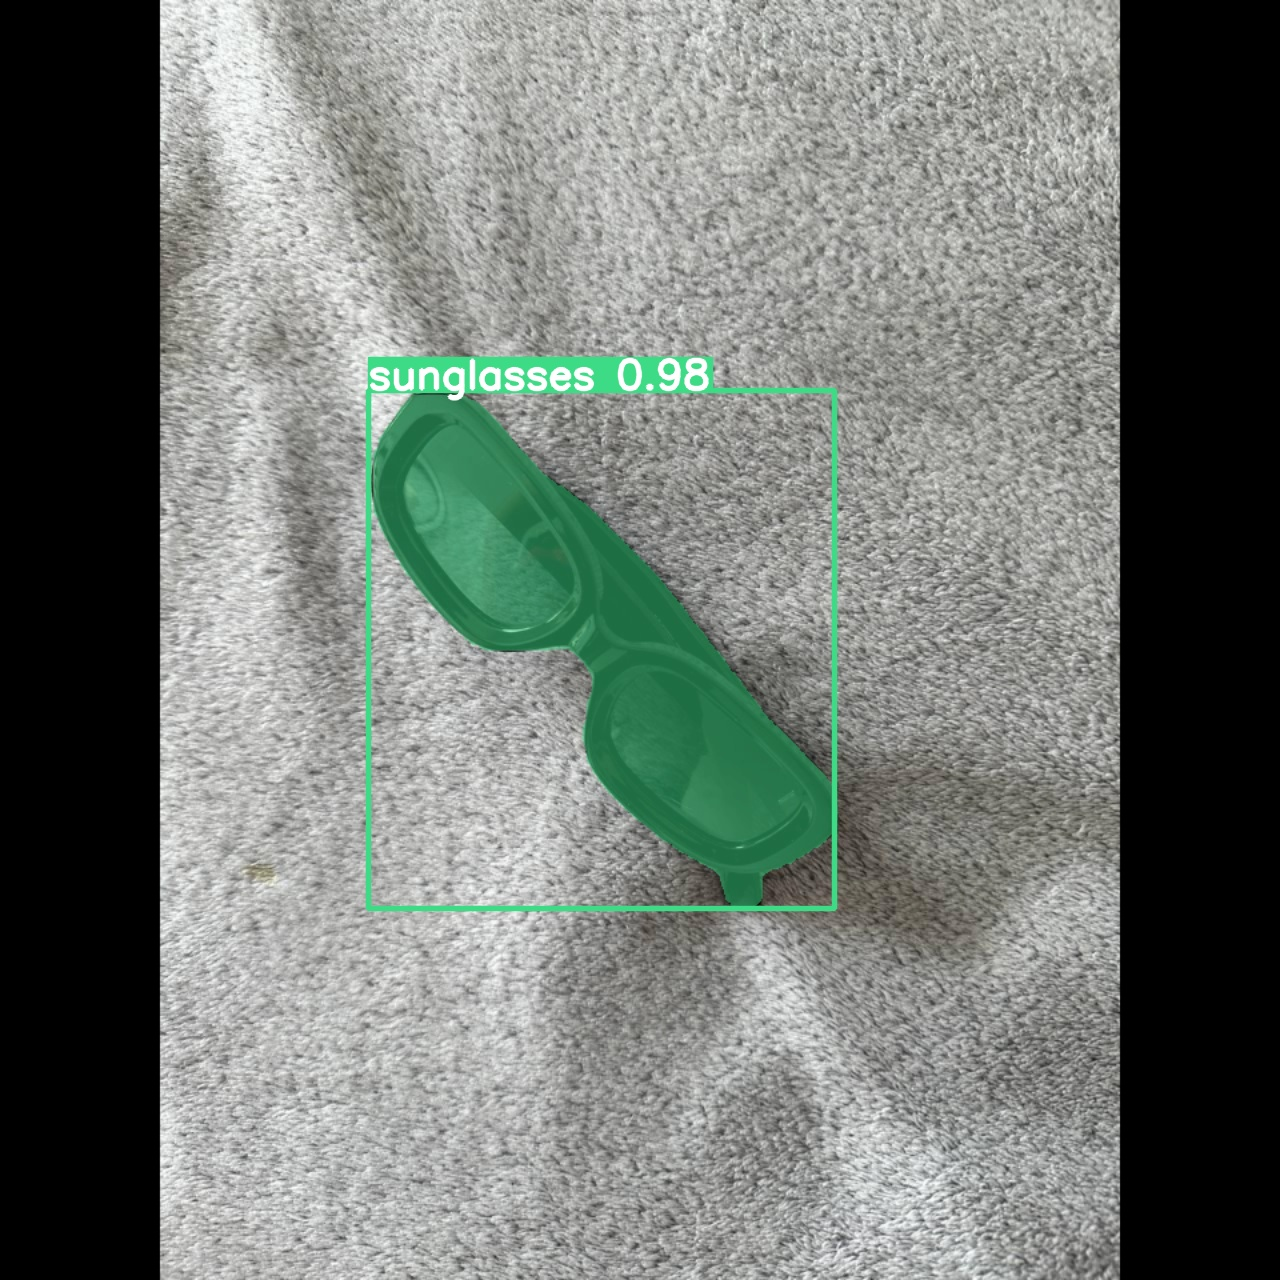

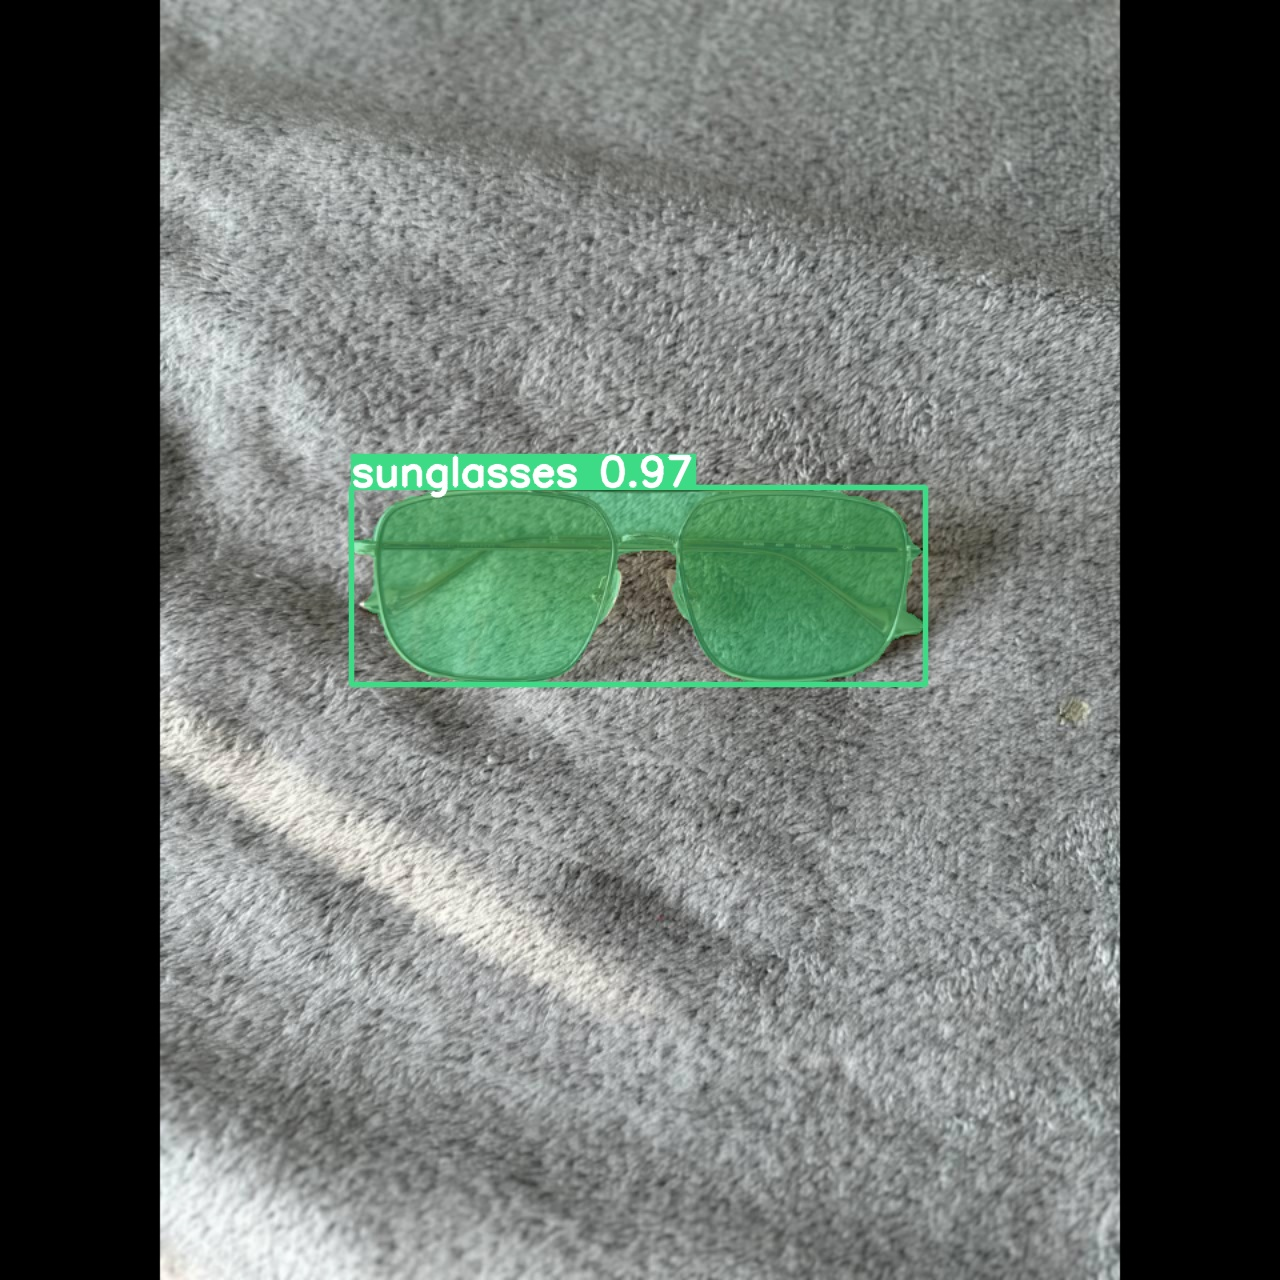

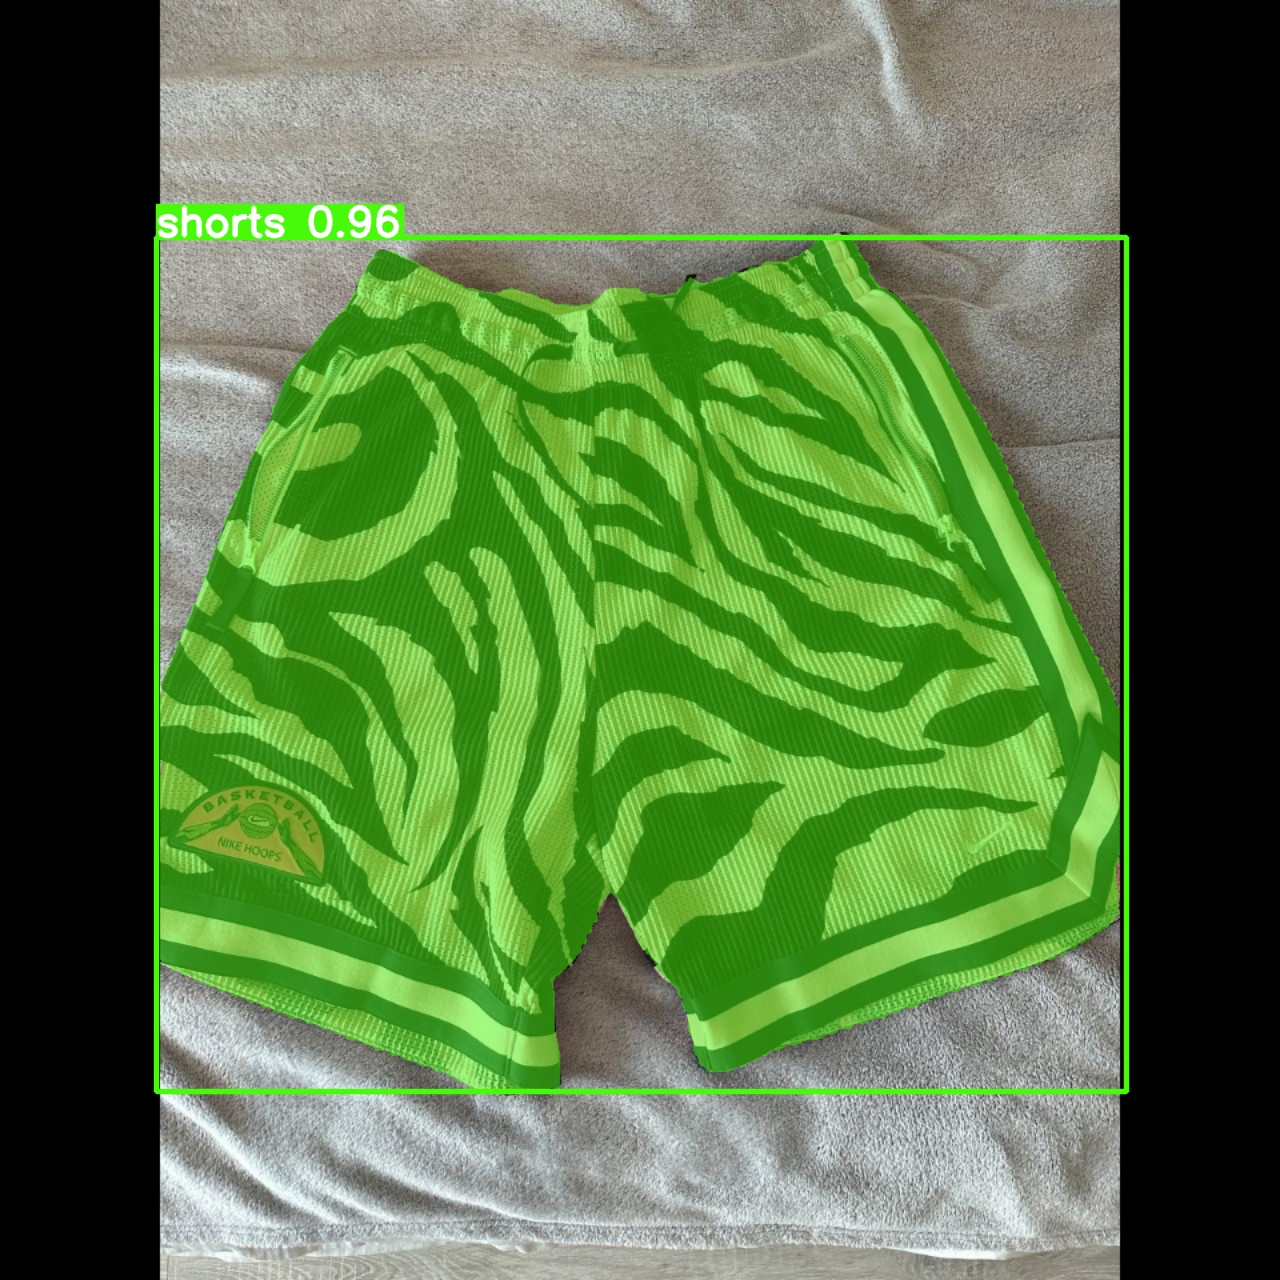

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Deploy model to Roboflow 

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/segment/train/")

Dependency ultralytics<=8.0.20 is required but found version=8.0.110, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/fashion-assistant-segmentation/deploy/5
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/fashion-assistant-segmentation/model/5


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.